# <a>**Lab_3**

```
Name:Fatma Eldesouky
Id:22
```

# **Documentation**

### **Content**


*   Unsupervised Learning (Advanced Clustering)
*   Required libraries
*   About dataset
*   Read the dataset
*   Statistics of the dataset
*   Data cleaning
*   Tfidf Vectorizer
*   Kmeans and Kmeans++
*   Random intilization
*   Evaluation Metric Clustering
*   k-means++ initialization
*   Evaluation Metric Clustering
*   KMeans with PCA
*   KMeans++ with PCA
*   compare the performance Mutual Information (MI)


###**Unsupervised Learning (Advanced Clustering)**



`Goal:`

`For this lab we will use Scikit-Learn’s API, sklearn.datasets, 
which allows us to access a famous dataset for linguistic analysis, 
the 20newsgroups dataset. A newsgroup is an online user discussion 
group, such as a forum. Sklearn allows us to access different categories 
of content. We will use texts that have to do with technology, religion and sport.`

task is to perform clustering on the given dataset.




### **Required libraries**

In [ ]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import sklearn
import nltk
import re
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import warnings

warnings.filterwarnings("ignore")

### **About dataset**


`The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date`

## **Task 1**

`1-Read the dataset`

`2-report the basic statistics of the dataset`

`3-import data from sklearn.datasets and selecte pre-defined categories:`

```
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]

dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
```




### **Read the dataset**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
# TODO code for task 1
from sklearn.datasets import fetch_20newsgroups
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [ ]:
#split dataset to feature and label (X,Y)
X=dataset.data
Y=dataset.target

In [ ]:
df=pd.DataFrame(X)
df_Y=pd.DataFrame(Y)
df.head()

,0
0,I just moved from Borland C++ 3.0 to Visual C+...
1,\n: \tNice cop out bill.\n\nI'm sure you're ri...
2,I'm attempting to transfer files from my home ...
3,\nThen not murdering would have no moral signi...
4,\nI could give much the same testimonial about...


In [ ]:
#display the true number of labels in our case
label_y= len(np.unique(Y)) 
print(label_y)

5


In [ ]:
df.shape

(2852, 1)

### **Statistics of the dataset**

> Info:for printing a summary about the columns and data types in the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2852 non-null   object
dtypes: object(1)
memory usage: 22.4+ KB


> check null values

In [ ]:
df.isnull().sum()

0    0
dtype: int64

> describe: for showing statistical information about the nummerical values in the dataframe

In [ ]:
#describe data
df.describe(include='object').T

,count,unique,top,freq
0,2852,2770,,61


In [ ]:
# use the DataFrame.duplicated() method to return a series of boolean values
df.duplicated(subset=None).all()

False



---

## **Task 2**

`Use standard text preprocessing steps to preprocess raw textual content. 
A sample preprocessing function is provided as below.`

### **Data cleaning**

In [ ]:
# applying text preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def preprocess_text(text, remove_stopwords=True): 
  # remove links
  text = re.sub(r"http\S+", "", text)
  # remove special chars and numbers
  text = re.sub("[^A-Za-z]+", " ", text)
  # remove stopwords
  if remove_stopwords:
      # 1. tokenize
      tokens = nltk.word_tokenize(text)
      # 2. check if stopword
      tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
      # 3. join back together
      text = " ".join(tokens)
  # return text in lower case and stripped of whitespaces
  text = text.lower().strip()
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["clean"] = df.iloc[:,0].apply(preprocess_text)

In [ ]:
df["clean"][0]

'moved borland c visual c today tried compile c program complained function prototype problem turned typedef word ms c byte unsigned int could anyone shine light subject word byte ming lin'



---

## **Task 3**

### **Tfidf Vectorizer**

`create vector representation of each document using TF-IDF encoding`

In [ ]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_word = TfidfVectorizer( analyzer="word", max_df=0.6, min_df=5, ngram_range=(1, 2), norm="l2")
tfidf_vector= vectorizer_word.fit_transform(df["clean"])

##**Task 4**

`Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k`

### **Kmeans and Kmeans++**



 **K-means clustering**  `is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.`

`The results of the K-means clustering algorithm are:`

* `The centroids of the K clusters, which can be used to label new data`
* `Labels for the training data (each data point is assigned to a single cluster)`

**Steps**

* `Choose the number K of clusters`
* `Select at random K points, the centroids (not necessarily from your dataset)`
* `Assign each data point to the closest centroid That forms K clusters`
* `Compute and place the new centroid of each cluster`
* `Reassign each data point to the new closest centroid.`

### **Random intilization**

`Random Partition Method`

`In this method, we randomly assign each point in the data to a random cluster ID. Then, we group the points by their cluster ID and take the average (per cluster ID) to yield the initial points. Random Partition method is known to yield initial points close to the mean of the Data.`

In [ ]:
#you just need to change init parameter to swtich between random intilization and k-means++ initialization. 
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
from sklearn.cluster import KMeans

wcss = []
for k in range(1,10):
    kmean = KMeans(n_clusters=k,init='random')
    kmean.fit(tfidf_vector)
    wcss.append(kmean.inertia_)

In [ ]:
wcss

[2715.0310782849733,
 2698.9666746038947,
 2688.1062963213026,
 2678.028981206724,
 2673.814688360752,
 2664.615173412388,
 2658.4185614971148,
 2651.622684420542,
 2653.2438461114198]

```
The way to evaluate the choice of K is made using a parameter known as WCSS
WCSS stands for Within Cluster Sum of Squares
```

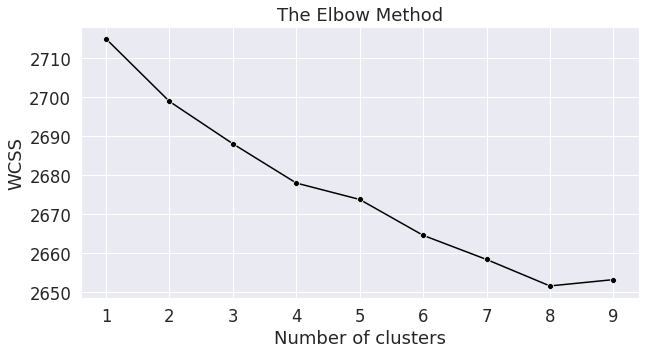

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

`Notes:`

`The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 5 there's no significant decrease in WCSS so 5 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed.`

`select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion`

In [ ]:
# Fitting K-Means to the dataset
kmeans1 = KMeans(n_clusters = 5, init = 'random',max_iter=900,random_state = 1,n_init = 30)
kmeans1.fit(tfidf_vector)

KMeans(init='random', max_iter=900, n_clusters=5, n_init=30, random_state=1)

### **Evaluation Metric Clustering**

In [ ]:
#Standard measures of cluster quality
from sklearn import metrics
#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, kmeans1.labels_))
print("Completeness: %0.4f" % metrics.completeness_score(Y, kmeans1.labels_))
print("V-measure: %0.4f" % metrics.v_measure_score(Y, kmeans1.labels_))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(Y, kmeans1.labels_))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(Y,kmeans1.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_vector, kmeans1.labels_, sample_size=800))

Homogeneity: 0.4022
Completeness: 0.4272
V-measure: 0.4143
Adjusted Rand-Index: 0.2625
Adjusted Mutual Info score: 0.4133
Silhouette Coefficient: 0.003


### **Task 6: compare the performance_2**

In [ ]:
from sklearn.metrics import mutual_info_score
#display mutual information based scores for the first model
print("mutual information based scores: %0.3f" % mutual_info_score(Y,kmeans1.labels_))

mutual information based scores: 0.646


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(Y, kmeans1.labels_)

0.41432028188786846

**Homogeneity**

`uniform in composition or character ,each cluster contains only members of a single class`

**Completeness**

`is a property of a statistic in relation to a model for a set of observed data. In essence, it ensures that the distributions
all members of a given class are assigned to the same cluster`

**V-measure**

`Their harmonic mean`

<a>Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.

**Silhouette Coefficient**

`The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters`

### **k-means++ initialization**

`Notes`

`In theory, k-means++ is much nicer. It is a biased random sampling that prefers points that are farther from each other, and avoids close points. Random initialization may be unlucky and choose nearby centers.`

`So in theory, k-means++ should require fewer iterations and have a higher chance of finding the global optimum.`

In [ ]:
# k-means++ initialization. 
wcss_2 = []
for k in range(1,10):
    kmean = KMeans(n_clusters=k,init='k-means++')
    kmean.fit(tfidf_vector)
    wcss_2.append(kmean.inertia_)

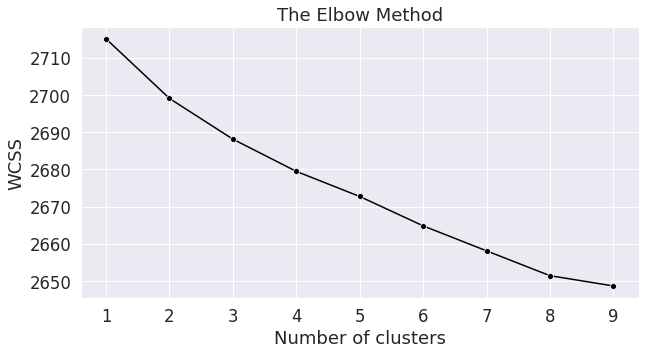

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss_2,marker='o',color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

`Notes:`

`The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 5 there's no significant decrease in WCSS so 5 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed.`

In [ ]:
# Fitting K-Means to the dataset
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++',n_init = 20,random_state=0)
kmeans2.fit(tfidf_vector)

KMeans(n_clusters=5, n_init=20, random_state=0)

### **Evaluation Metric Clustering**

In [ ]:
#Standard measures of cluster quality
from sklearn import metrics
#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, kmeans2.labels_))
print("Completeness: %0.4f" % metrics.completeness_score(Y, kmeans2.labels_))
print("V-measure: %0.4f" % metrics.v_measure_score(Y, kmeans2.labels_))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(Y, kmeans2.labels_))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(Y,kmeans2.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_vector, kmeans2.labels_, sample_size=800))

Homogeneity: 0.3651
Completeness: 0.3953
V-measure: 0.3796
Adjusted Rand-Index: 0.2312
Adjusted Mutual Info score: 0.3784
Silhouette Coefficient: 0.003


### **Task 6: compare the performance_2**

In [ ]:
from sklearn.metrics import mutual_info_score
#display mutual information based scores for the first model
print("mutual information based scores: %0.3f" % mutual_info_score(Y, kmeans2.labels_))

mutual information based scores: 0.586


`good mutual Info score`

`The MI score will fall in the range from 0 to 1. The higher value, the closer connection between this feature and the target, suggests that we should put this feature in the training dataset. If the MI score is 0 or very low like 0.01. the low score suggests a weak connection between this feature and the target`

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(Y, kmeans2.labels_)

0.3795815532909374

`Notes`

`Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation)`



---

##**Task 5**

`perform tricks on the above two approaches by considering the high-dimensional nature of the dataset`

`you can consider PCA (from sklearn.decomposition import PCA), or other methods.` 

### **KMeans with PCA**

`Notes`

* `PCA does not support sparse input. So I will use TruncatedSVD alternative`

In [ ]:
#Dimensionality reduction using truncated SVD
from sklearn.decomposition import TruncatedSVD
svd_kmean = TruncatedSVD(n_components=2000, random_state=42)
kmean_svd = svd_kmean.fit_transform(tfidf_vector)

In [ ]:
wcss = []
for k in range(1,10):
    kmean = KMeans(n_clusters=k,init='random')
    kmean.fit(tfidf_vector)
    wcss.append(kmean.inertia_)

In [ ]:
km_svd = KMeans(n_clusters=5, init='random',random_state=0,n_init = 30,max_iter=1000)

In [ ]:
km_svd.fit(kmean_svd)

KMeans(init='random', max_iter=1000, n_clusters=5, n_init=30, random_state=0)

In [ ]:
#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, km_svd.labels_))
print("Completeness: %0.4f" % metrics.completeness_score(Y, km_svd.labels_))
print("V-measure: %0.4f" % metrics.v_measure_score(Y, km_svd.labels_))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(Y, km_svd.labels_))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(Y,km_svd.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_vector, km_svd.labels_, sample_size=1000))

Homogeneity: 0.3272
Completeness: 0.4049
V-measure: 0.3619
Adjusted Rand-Index: 0.1946
Adjusted Mutual Info score: 0.3607
Silhouette Coefficient: 0.008


### **Task 6: compare the performance_3**

In [ ]:
from sklearn.metrics import mutual_info_score
#display mutual information based scores for the first model
print("mutual information based scores: %0.3f" % mutual_info_score(Y, km_svd.labels_))

mutual information based scores: 0.525




---

### **KMeans++ with PCA**

In [ ]:
svd_kmean = TruncatedSVD(n_components=2000, random_state=42)
kmean_svd = svd_kmean.fit_transform(tfidf_vector)

In [ ]:
km_svd2 = KMeans(n_clusters=5, init='k-means++',random_state=1,n_init = 30,max_iter=1000)

In [ ]:
km_svd2.fit(kmean_svd)

KMeans(max_iter=1000, n_clusters=5, n_init=30, random_state=1)

In [ ]:
#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(Y, km_svd2.labels_))
print("Completeness: %0.4f" % metrics.completeness_score(Y, km_svd2.labels_))
print("V-measure: %0.4f" % metrics.v_measure_score(Y, km_svd2.labels_))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(Y, km_svd2.labels_))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(Y,km_svd2.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_vector, km_svd2.labels_, sample_size=1000))

Homogeneity: 0.3862
Completeness: 0.4090
V-measure: 0.3973
Adjusted Rand-Index: 0.2504
Adjusted Mutual Info score: 0.3962
Silhouette Coefficient: 0.003


### **Task 6: compare the performance_4**

In [ ]:
from sklearn.metrics import mutual_info_score
#display mutual information based scores for the first model
print("mutual information based scores: %0.3f" % mutual_info_score(Y, km_svd2.labels_))

mutual information based scores: 0.620


## **Task 6**

`compare the performance of the above four approaches on the given`

In [ ]:
# TODO for Task 6
# for comparing the performance of the above four approaches :
from sklearn.metrics import mutual_info_score

model_kmeans1=mutual_info_score(dataset.target,kmeans1.labels_)
model_kmeans2=mutual_info_score(dataset.target,kmeans2.labels_)
model_kmeans3=mutual_info_score(dataset.target,km_svd.labels_)
model_kmeans4=mutual_info_score(dataset.target,km_svd2.labels_)

In [ ]:
# print the scores of each approach:

print("model_kmeans1 is : ",model_kmeans1,'\n'
      "model_kmeans2 is : ",model_kmeans2,'\n'
      "model_kmeans3 is : ",model_kmeans3,'\n'
      "model_kmeans4 is : ",model_kmeans4,)

model_kmeans1 is :  0.6459646095044479 
model_kmeans2 is :  0.5863182511974536 
model_kmeans3 is :  0.5254708411240258 
model_kmeans4 is :  0.6203018920463748


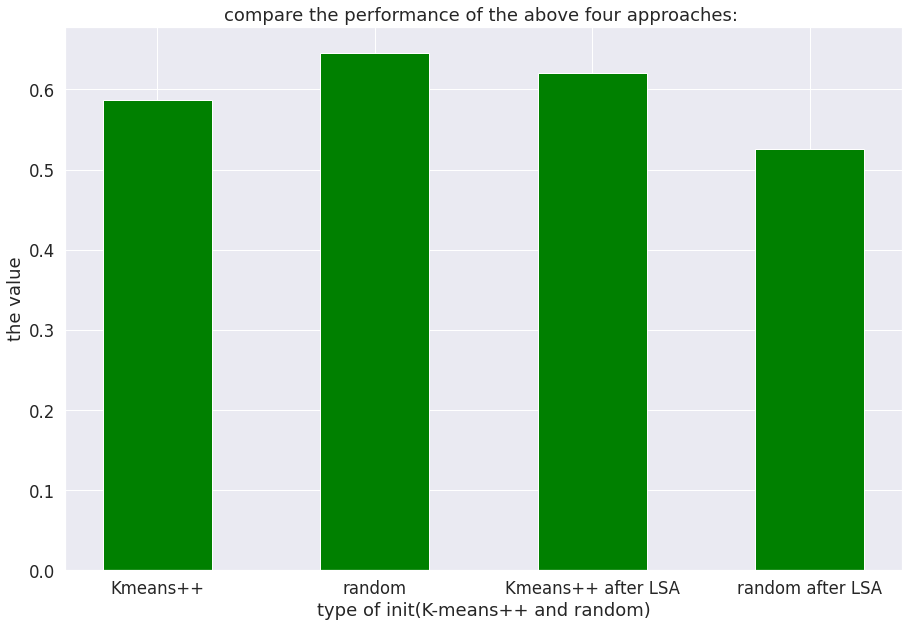

In [ ]:
# draw the bar plot that shows the difference :

data = {'Kmeans++':model_kmeans2,
        'random':model_kmeans1 ,
        'Kmeans++ after LSA':model_kmeans4,
        'random after LSA':model_kmeans3,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 10))
 
plt.bar(courses, values, color ='green',width = 0.5)

plt.title("compare the performance of the above four approaches: ")

plt.xlabel("type of init(K-means++ and random)")
plt.ylabel("the value")

plt.show()



---
